# METRIC FOR REGRESSION

1. Mean squared error
2. Mean absolute error
3. R squared score

In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np

cali_data = fetch_california_housing()

cali_df = pd.DataFrame(cali_data.data, columns=cali_data.feature_names)


In [7]:
from sklearn import metrics
import numpy as np
np.random.seed(1)
y = np.random.randn(10)

y_pred = y + .5 * np.random.randn(10)

print('MSE: %f' % metrics.mean_squared_error(y, y_pred))
print('MAE: %f' % metrics.mean_absolute_error(y, y_pred))
print('R^2: %f' % metrics.r2_score(y, y_pred))

MSE: 0.256760
MAE: 0.406885
R^2: 0.818959


In [8]:
p_pred = np.linspace(0, 1, 1000)
y = np.random.binomial(1, p_pred)

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
from ipywidgets import interact

def plot_threshold(threshold=0.5):
    true_pos = (p_pred > threshold) & (y == 1)
    true_neg = (p_pred < threshold) & (y == 0)
    false_pos = (p_pred > threshold) & (y == 0)
    false_neg = (p_pred < threshold) & (y == 1)

    plt.plot(p_pred[true_pos], y[true_pos], '.', label='True positive')
    plt.plot(p_pred[false_pos], y[false_pos], '.', label='False positive')
    plt.plot(p_pred[true_neg], y[true_neg], '.', label='True negative')
    plt.plot(p_pred[false_neg], y[false_neg], '.', label='False negative')

    plt.axvline(threshold)
    plt.ylim(-0.25, 1.25)
    plt.legend()

    precision = 1
    if (p_pred > threshold).sum() > 0:
        precision = float(true_pos.sum()) / (true_pos.sum() + false_pos.sum())
    recall = float(true_pos.sum()) / (true_pos.sum() + false_neg.sum())

    plt.title('Precision: %0.2f | Recall: %0.2f' % (precision, recall))

interact(plot_threshold, threshold=(0, 1, 0.1));

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0), Output()), _dom_classes=('widg…

In [14]:
gas = pd.read_csv('./data/gas_consumption.csv', names =['tax', 'income', 'highway', 'drivers', 'gas'])

In [15]:
gas.head()

,tax,income,highway,drivers,gas
1,9.0,3571,1976,0.525,541
2,9.0,4092,1250,0.572,524
3,9.0,3865,1586,0.580,561
4,7.5,4870,2351,0.529,414
5,8.0,4399,431,0.544,410


In [16]:
type(gas[['drivers']])

pandas.core.frame.DataFrame

In [21]:
linreg.intercept_

-227.3091174945256

In [22]:
beta0 = linreg.intercept_
betavalues = np.linspace(1300, 1500)

MSE = [((gas['gas'] - ((beta0+ m* gas['drivers'])))**2).sum() for m in betavalues]

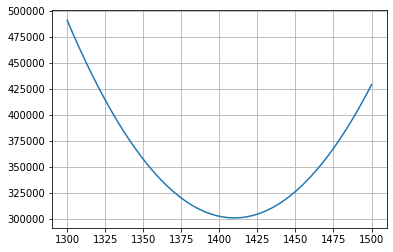

In [23]:
plt.plot(betavalues, MSE)
plt.grid()

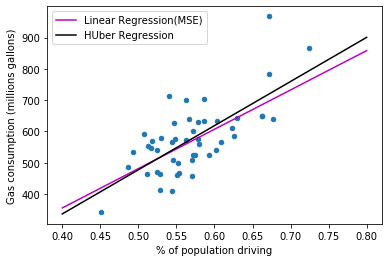

In [20]:
from sklearn.linear_model import HuberRegressor, RANSACRegressor, LinearRegression, Ridge, Lasso
X = gas[['drivers']]
y = gas['gas']
linreg = LinearRegression(fit_intercept=True)
linreg.fit(X,y)
ridge = Ridge(fit_intercept=True) 
ridge.fit(X, y)
lasso = RANSACRegressor()
lasso.fit(X, y)
huber = HuberRegressor(fit_intercept=True, alpha=0)
huber.fit (X,y)


gas.plot(x='drivers', y='gas', kind='scatter')
plt.xlabel('% of population driving')
plt.ylabel('Gas consumption (millions gallons)')

x = np.linspace(.4, .8).reshape(-1, 1)


#plt.plot(x, lasso.predict(x), 'blue')
#plt.plot(x, ridge.predict(x), 'orange')
plt.plot(x, huber.predict(x), 'm')
plt.plot(x, linreg.predict(x), 'k-')
# plt.plot([.4, .8], [300, 1000], 'r-')
#plt.plot([.4, .8], [200, 1100], 'g-');

plt.legend(['Linear Regression(MSE)', 'HUber Regression'])


The outlier points wont have a great influence on model when using huber regression

In [54]:
from ipywidgets import interact, widgets

In [55]:
gas.head()

,tax,income,highway,drivers,gas
1,9.0,3571,1976,0.525,541
2,9.0,4092,1250,0.572,524
3,9.0,3865,1586,0.580,561
4,7.5,4870,2351,0.529,414
5,8.0,4399,431,0.544,410


In [56]:
dropdown_menu = {v: k for k, v in feature_desc.items()}

In [57]:
dropdown_menu

{'Gas tax': 'tax',
 '% of population driving': 'drivers',
 'Average income (USD)': 'income',
 'Miles of paved highway': 'highway'}

# Multivariate Regression

In [58]:
feature_desc = {'tax': 'Gas tax', 'drivers': '% of population driving', 
                'income': 'Average income (USD)', 'highway': 'Miles of paved highway'}

def feature (col):
    plt.plot(gas[col], gas['gas'], '.')
    plt.xlabel(feature_desc[col])
    plt.ylabel('% gas consumption')

widgets.interact(feature, col=dropdown_menu);
    

interactive(children=(Dropdown(description='col', options={'Gas tax': 'tax', '% of population driving': 'drive…

Text(0.5, 0, 'Y')

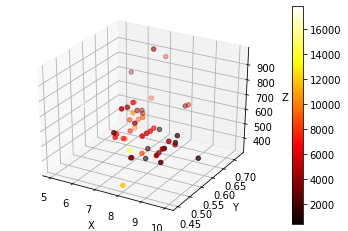

In [71]:
#from mpl_toolkits.mplot3d import Axes3D

plt3d = plt.figure().gca(projection='3d')
XY = plt3d.scatter(gas['tax'], gas['drivers'], gas['gas'], c=gas['highway'], cmap=plt.hot());
plt.colorbar(XY)
plt3d.set_xlabel('X'); plt3d.set_zlabel('Z');plt3d.set_ylabel('Y')

In [60]:
linreg.fit(gas[['tax', 'drivers']], gas['gas'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

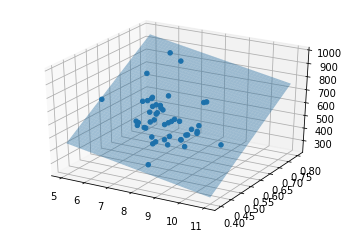

In [61]:
plt3d = plt.figure().gca(projection='3d')

xx, yy = np.meshgrid(np.linspace(5, 11), np.linspace(.4, .8))
z = linreg.intercept_ + linreg.coef_[0] * xx + linreg.coef_[1] * yy
plt3d.plot_surface(xx, yy, z, alpha=0.4)
plt3d.scatter(gas['tax'], gas['drivers'], gas['gas'], alpha=1);

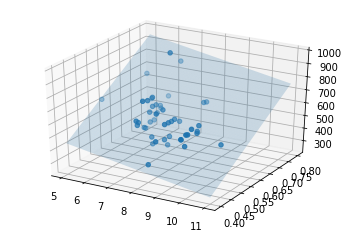

In [89]:
plt3d = plt.figure().gca(projection='3d')

xx, yy = np.meshgrid(np.linspace(5, 11), np.linspace(.4, .8))
z = linreg.intercept_ + linreg.coef_[0] * xx + linreg.coef_[1] * yy
plt3d.plot_surface(xx, yy, z, alpha=0.2)
plt3d.scatter(gas['tax'], gas['drivers'], gas['gas']);

In [68]:
from ipywidgets import interact

def plot_cross(tax=5):
    x = np.linspace(.4, .8)
    plt.plot(x, linreg.intercept_ + linreg.coef_[0]*tax + linreg.coef_[1]*x)
    alpha = 1 - abs(gas['tax'] - tax) / abs(gas['tax'] - tax).max()
    colors = np.zeros((len(gas), 4))
    colors[:, 3] = alpha
    plt.scatter(gas['drivers'], gas['gas'], color=colors)

interact(plot_cross, tax=(5,11, 1));

interactive(children=(IntSlider(value=5, description='tax', max=11, min=5), Output()), _dom_classes=('widget-i…

In [94]:
gas.columns

Index(['tax', 'income', 'highway', 'drivers', 'gas'], dtype='object')

# FEATURE IMPORTANCE

In [95]:
X = gas[['tax', 'income', 'highway', 'drivers']]
y = gas['gas']

In [98]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([('scaler', StandardScaler()), ('lr', linreg)])

pipe.fit(X,y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lr',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [99]:
pipe.named_steps

{'scaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'lr': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)}

In [100]:
lr = pipe.named_steps['lr']

In [118]:
lr.coef_

array([-32.7310515 , -37.79691223,  -8.3813148 ,  73.3569154 ])

In [103]:
sc = pipe.named_steps['scaler']

In [107]:
sc.var_  #variance od each feature in the training set. 
#small variance indicate feature is close to mean

array([8.85130556e-01, 3.22189139e+05, 1.19366510e+07, 3.01284722e-03])

In [111]:
list (sc.var_)

[0.8851305555555555,
 322189.13888888893,
 11936650.993055554,
 0.0030128472222222223]

In [116]:
list(sc.mean_)

[7.668333333333333, 4241.833333333333, 5565.416666666667, 0.5703333333333332]

In [114]:
coef = np.abs(lr.coef_)
(coef/coef.sum())*100

array([21.49594119, 24.82291785,  5.5043832 , 48.17675776])